## License Information
---

This file is distributed as part of `swprocess`, a Python package for surface wave processing.

    Copyright (C) 2020 Joseph P. Vantassel (jvantassel@utexas.edu)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _swprocess_ and this notebook
---

`swprocess` is a Python package for surface wave processing. `swprocess` was developed by
Joseph P. Vantassel under the supervision of Professor Brady R. Cox at The University of
Texas at Austin.

If you use _swprocess_ in your research or consulting, we ask you please cite the following:

__TBD__

<!-- >Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)
 _Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for `hvsrpy`, please use the citation tool on the `hvsrpy`
[archive](http://doi.org/10.5281/zenodo.3666956)._
 -->

<!-- The automated frequency-domain window-rejection algorithm and log-normal statistics
implemented in `hvsrpy` were developed by Tianjian Cheng under the supervision of
Professor Brady R. Cox at The University of Texas at Austin. To
recognize their original work please cite the follwing:

> Cox, B. R., Cheng, T., Vantassel, J. P., and Manuel, L. (2020). “A statistical
> representation and frequency-domain window-rejection algorithm for single-station
> HVSR measurements.” Geophysical Journal International, 221(3), 2170-2183.

This notebook also provides automatic checking of the SESAME (2004) reliability
and clarity critera. To recognize their original work please also cite the following:

> SESAME. (2004). Guidelines for the Implementation of the H/V Spectral Ratio Technique on Ambient Vibrations
> Measurements, Processing, and Interpretation. European Commission - Research General Directorate, 62,
> European Commission - Research General Directorate.
 -->
 
## Getting Started
---
1. Install _swprocess_ and its dependencies, with `pip install swprocess`. If you are not familiar with `pip`, a useful tutorial can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__ 

__TBD__

Happy Processing!

In [1]:
import os
import json
import time
        
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

import swprocess

## Input
---

### Files

In [2]:
# Path (relative or full) to a folder containing the data files. Data files must be in either the SEG2 and/or SU data format.
path_to_folder = "data/wghs/"

# Files grouped by source offset. Each set may contain the location a single or multiple files.
# By default the notebook assumes that multiple source offsets have been used (6 in this examples, set0 to set5)
# with multiple shots per source offset (5 in this example). The files of a set will be stacked according
# to the selected MASW workflow (selected next).
set0 = [f"{path_to_folder}{x}.dat" for x in range(6, 11)]
set1 = [f"{path_to_folder}{x}.dat" for x in range(11, 16)]
set2 = [f"{path_to_folder}{x}.dat" for x in range(16, 21)]
set3 = [f"{path_to_folder}{x}.dat" for x in range(26, 31)]
set4 = [f"{path_to_folder}{x}.dat" for x in range(31, 36)]
set5 = [f"{path_to_folder}{x}.dat" for x in range(36, 41)]
fnames_set = [set0, set1, set2, set3, set4, set5]

print("Summary:")
for set_number, fnames in enumerate(fnames_set):
    print(f"  set{set_number} includes {len(fnames)} files from {fnames[0]} to {fnames[-1]}")

Summary:
  set0 includes 5 files from data/wghs/6.dat to data/wghs/10.dat
  set1 includes 5 files from data/wghs/11.dat to data/wghs/15.dat
  set2 includes 5 files from data/wghs/16.dat to data/wghs/20.dat
  set3 includes 5 files from data/wghs/26.dat to data/wghs/30.dat
  set4 includes 5 files from data/wghs/31.dat to data/wghs/35.dat
  set5 includes 5 files from data/wghs/36.dat to data/wghs/40.dat


### Names

In [3]:
# Name for each fnames_set, if None, sets will be named according to the source position.
names = None
# names = ["-5", "-10", "-20", "51", "56", "66"]

### Workflow

In [4]:
# Masw workflow {"time-domain", "frequency-domain", "single"}, time-domain is recommended
workflow = "time-domain"

### Pre-processing

In [5]:
# Trim record between the specified begin and end times (time in seconds). Trimming is recommended, however
# it must be done carefully to avoid accidentally trimming signal, particularly for far offsets.
trim, trim_begin, trim_end = True, 0, 0.5

# Mute portions of the time-domain record to isolate surface wave energy. No muting is recommended.
# Mute method {"interactive"} and window_kwargs (see documenation for details).
mute, method, window_kwargs = False, "interactive", {}

# Zero pad the time-domain record to achieve a desired frequency step. Padding with df=0.5 is recommended.
pad, df = True, 0.5

### Processing

In [6]:
# Wavefield transform {"fk", "slantstack", "phaseshift", "fdbf"}, "fdbf" is recommended.
transform = "fdbf"

# Minimum and maximum frequencies of interest (frequency in Hertz).
fmin, fmax = 5, 100

# Selection of trial velocities (velocity in m/s) with minimum, maximum, number of steps, and space {"linear", "log"}.  
vmin, vmax, nvel, vspace = 100, 500, 400, "linear"

# Weighting for "fdbf" {"sqrt", "invamp", "none"} (ignored for all other wavefield transforms). "sqrt" is recommended. 
fdbf_weighting = "sqrt"

# Steering vector for "fdbf" {"cylindrical", "plane"} (ignored for all other wavefield transforms). "cylindrical" is recommended.
fdbf_steering = "cylindrical"

### Signal-to-Noise

In [7]:
# Compute the records signal-to-noise ratio. 
snr = True

# Define noise and signal windows being and end times (time in seconds). Negative time refers to pre-trigger record.
noise_begin, noise_end =  -0.5, 0.
signal_begin, signal_end = 0., 0.5

# Zero pad the noise and signal records to achieve a specified frequency step. Padding with df=1 is recommended.
pad_snr, df_snr = True, 1

## Analysis
---


In [8]:
# Perform the selcted MASW workflow. No changes to this cell are required, however you may
# wish to change the variable `settings_fname` to a more specific name for later reference.
# This cell may take several seconds to run.
%matplotlib qt5
settings_fname = "masw_settings.json"
swprocess.Masw.create_settings_file(fname=settings_fname, workflow=workflow,
                                     trim=trim, trim_begin=trim_begin, trim_end=trim_end,
                                     mute=mute, method=method, window_kwargs=window_kwargs,
                                     transform=transform, fmin=fmin, fmax=fmax, pad=pad, df=df,
                                     vmin=vmin, vmax=vmax, nvel=nvel, vspace=vspace,
                                     weighting=fdbf_weighting, steering=fdbf_steering,
                                     snr=snr, noise_begin=noise_begin, noise_end=noise_end,
                                     signal_begin=signal_begin, signal_end=signal_end,
                                     pad_snr = pad_snr, df_snr=df_snr)

start = time.perf_counter()
wavefieldtransforms = []
for fnames in fnames_set: 
    wavefieldtransforms.append(swprocess.Masw.run(fnames=fnames, settings_fname=settings_fname))
end = time.perf_counter()
print(f"Elapsed Time (s): {round(end-start,2)}")

Elapsed Time (s): 16.04


## Post-Analysis Settings
---

### Dispersion Image

In [9]:
# Image normalization {"none", "absolute-maximum" "frequency-maximum"} -> "frequency-maximum" is recommended.
wavefield_normalization = "frequency-maximum"

# Display the wavelength resolution limit.
display_lambda_res = True

# Display Yoon and Rix (2009) near-field criteria.
display_nearfield = True
number_of_array_center_distances = 1

## Plot Results
---

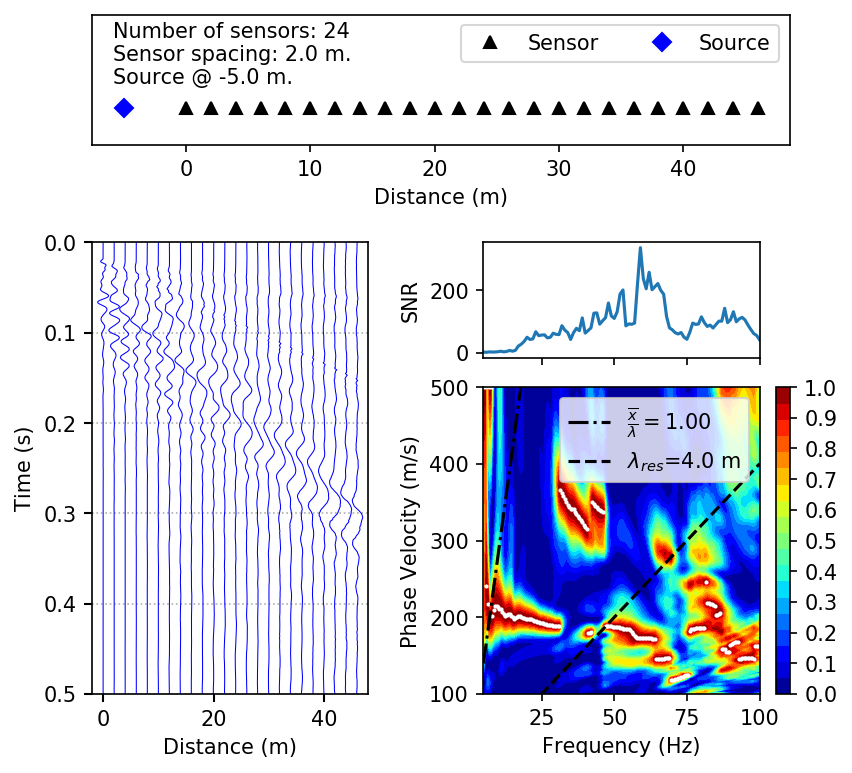

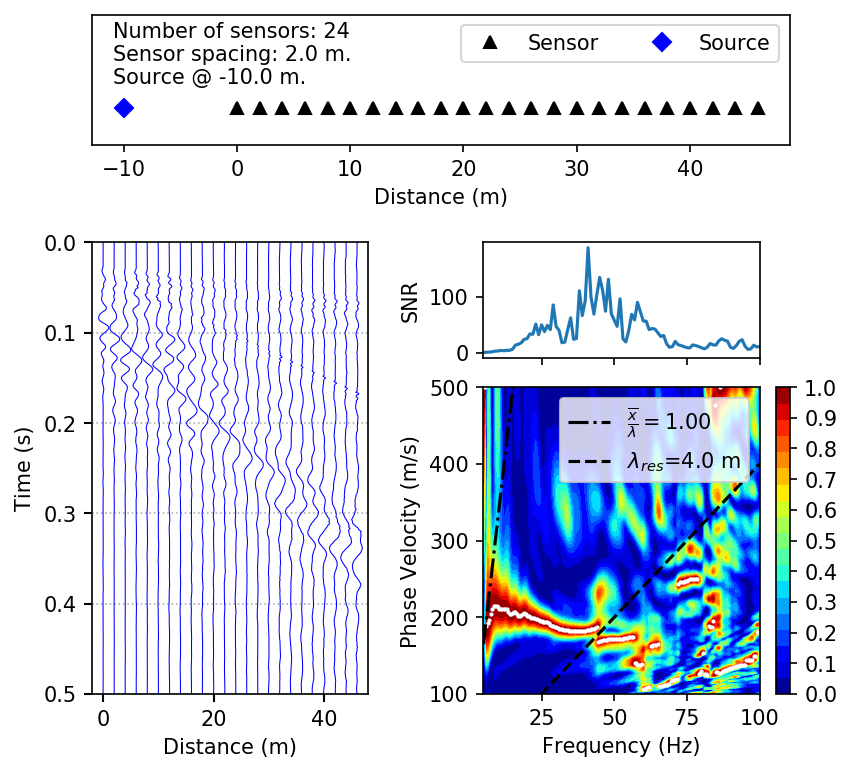

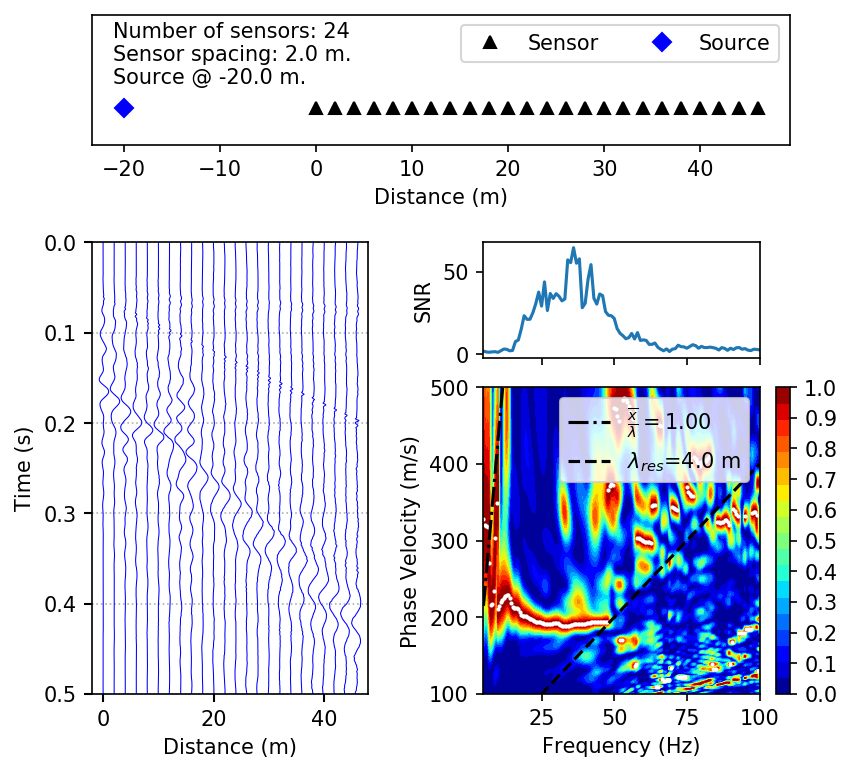

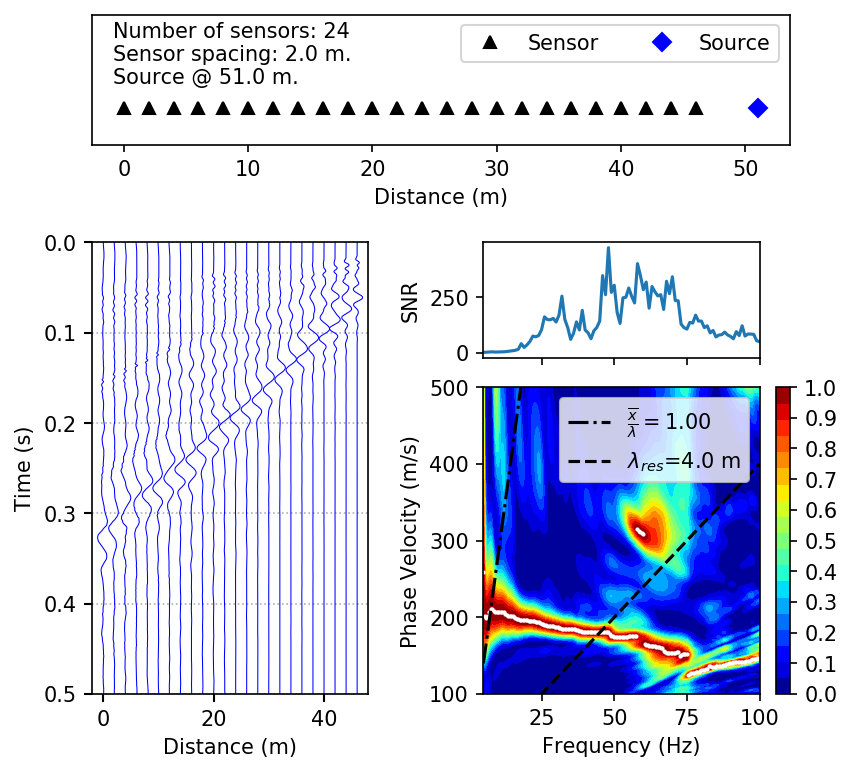

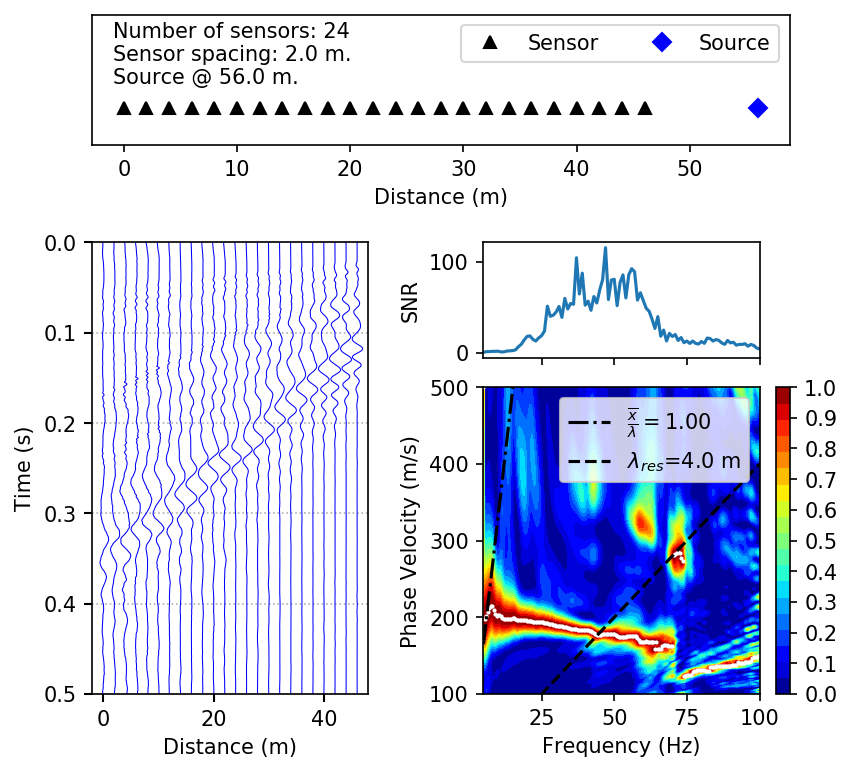

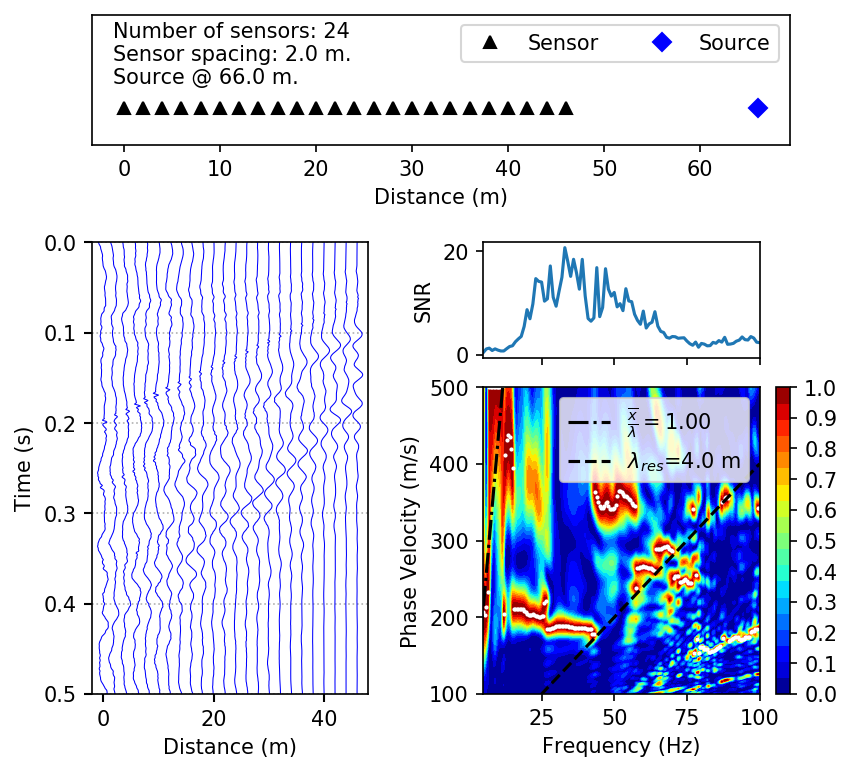

In [10]:
%matplotlib inline
figures = []
for wavefieldtransform in wavefieldtransforms:
    fig = plt.figure(figsize=(6,6), dpi=150)

    gs = GridSpec(nrows=4, ncols=4, height_ratios=(1.7, 0.5, 1.5, 4), width_ratios=(1, 0.3, 1, 0.05), hspace=0.2, wspace=0.1)
    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[2:4, 0])
    ax2 = fig.add_subplot(gs[2, 2])
    ax3 = fig.add_subplot(gs[3, 2])
    ax4 = fig.add_subplot(gs[3, 3])

    # Array
    wavefieldtransform.array.plot(ax=ax0)
    ax0.set_yticks([])
    ax0.legend(ncol=2)
    
    # Timeseries
    wavefieldtransform.array.waterfall(ax=ax1, amplitude_detrend=False, amplitude_normalization="each")
    if trim:
        ax1.set_ylim((trim_end, trim_begin))

    # Signal-to-Noise Ratio
    wavefieldtransform.plot_snr(ax=ax2)
    ax2.set_xticklabels([])
    ax2.set_xlabel("")
    ax2.set_ylabel("SNR")
    
    # Dispersion Image
    if display_nearfield:
        nearfield = number_of_array_center_distances
    else:
        nearfield = False
    wavefieldtransform.plot(fig=fig, ax=ax3, cax=ax4, normalization=wavefield_normalization, nearfield=nearfield)
    xlim = ax3.get_xlim()
    ylim = ax3.get_ylim()
    if display_lambda_res:
        kres_format = dict(linewidth=1.5, color="#000000", linestyle="--")
        kres = wavefieldtransform.array.kres
        kvelocity = 2*np.pi*wavefieldtransform.frequencies / kres
        ax3.plot(wavefieldtransform.frequencies, kvelocity, label=r"$\lambda_{res}$" + f"={np.round(2*np.pi/kres,2)} m", **kres_format)
        ax3.legend(loc="upper right")
    ax3.set_xlim(xlim)
    ax2.set_xlim(xlim)
    ax3.set_ylim(ylim)
    
    figures.append(fig)
    plt.show()
    print("\n\n\n")

## Save Peaks to File
---

In [11]:
output_fname = "wghs_masw.json"

names = names if names is not None else [f"{x.array.source.x}" for x in wavefieldtransforms]
if len(names) != len(wavefieldtransforms):
    raise ValueError(f"len(fnames_set)={len(fnames_set)} must equal len(names)={len(names)}.")

append = False    
for name, wavefieldtransform in zip(names, wavefieldtransforms):
    peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                                 wavefieldtransform.find_peak_power(by="frequency-maximum"),
                                 identifier=name)
    peak.to_json(fname=output_fname, append=append)
    append = True

## Save Images
---

In [12]:
prefix = "wghs" 

for name, wavefieldtransform, figure in zip(names, wavefieldtransforms, figures):
    figure.savefig(f"{prefix}_{name}m.png", dpi=300, bbox_inches="tight")